In [1]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
import torch
from PIL import Image
from IPython.display import display
from sc_reconstructor import SC_Reconstructor
from inference.utils import show_images

/export/raid1/home/kneel027/mamba/envs/mindeye_imagery_sc/lib/python3.11/site-packages/kornia/feature/lightglue.py:44: FutureWarning: `torch.cuda.amp.custom_fwd(args...)` is deprecated. Please use `torch.amp.custom_fwd(args..., device_type='cuda')` instead.
  @torch.cuda.amp.custom_fwd(cast_inputs=torch.float32)
/export/raid1/home/kneel027/mamba/envs/mindeye_imagery_sc/lib/python3.11/site-packages/albumentations/__init__.py:13: UserWarning: A new version of Albumentations is available: 1.4.21 (you have 1.4.18). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()


In [2]:
device = "cuda"
reconstructor = SC_Reconstructor(compile_models=False, device=device)
# recon_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/imagery/subj01_40sess_hypatia_ridge_sc_0.70_strength_vdvae/subject1"
# pred_clip_image = torch.load(f"{recon_path}/stable_cascade_image_voxels.pt")
# pred_clip_text = torch.load(f"{recon_path}/stable_cascade_text_voxels.pt")
# pred_latents = torch.load(f"{recon_path}/stable_cascade_latent_voxels.pt")

Stable Cascade Reconstructor: Loading model...
['model_version', 'effnet_checkpoint_path', 'previewer_checkpoint_path']
['transforms', 'clip_preprocess', 'gdf', 'sampling_configs', 'effnet_preprocess']


Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

['tokenizer', 'text_model', 'generator', 'effnet', 'previewer']
STAGE C READY
['model_version', 'stage_a_checkpoint_path', 'effnet_checkpoint_path']
['transforms', 'clip_preprocess', 'gdf', 'sampling_configs', 'effnet_preprocess']
['tokenizer', 'text_model', 'generator', 'effnet', 'stage_a']
['tokenizer', 'text_model', 'generator', 'effnet', 'stage_a']
STAGE B READY


In [3]:
recon_path = "/home/naxos2-raid25/kneel027/home/kneel027/Second-Sight/output/mental_imagery_paper_b3/imagery/subj01_40sess_hypatia_ridge_sc_0.70_strength_vdvae/subject1"
index = 0
low_level = Image.open(f"{recon_path}/{index}/low_level.png")
image_embedding = reconstructor.embed_image(low_level)

torch.Size([1, 3, 224, 224])
CLIPVisionModelWithProjection(
  (vision_model): CLIPVisionTransformer(
    (embeddings): CLIPVisionEmbeddings(
      (patch_embedding): Conv2d(3, 1024, kernel_size=(14, 14), stride=(14, 14), bias=False)
      (position_embedding): Embedding(257, 1024)
    )
    (pre_layrnorm): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
    (encoder): CLIPEncoder(
      (layers): ModuleList(
        (0-23): 24 x CLIPEncoderLayer(
          (self_attn): CLIPSdpaAttention(
            (k_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (v_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (q_proj): Linear(in_features=1024, out_features=1024, bias=True)
            (out_proj): Linear(in_features=1024, out_features=1024, bias=True)
          )
          (layer_norm1): LayerNorm((1024,), eps=1e-05, elementwise_affine=True)
          (mlp): CLIPMLP(
            (activation_fn): QuickGELUActivation()
            (fc1): Li

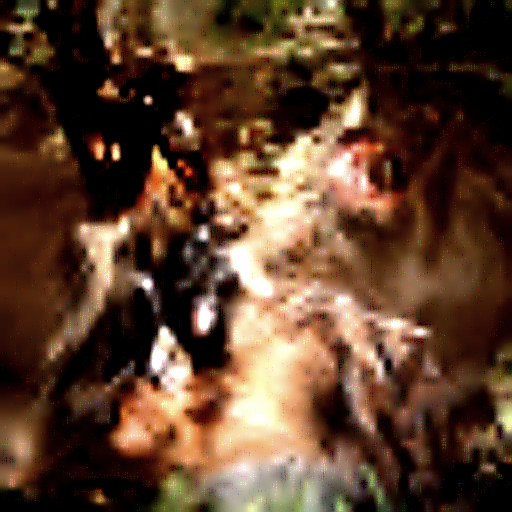

In [6]:
from PIL import ImageFilter, ImageEnhance


index = 5
clip_text_pred = pred_clip_text[index]
clip_image_pred = pred_clip_image[index]
latent_pred = pred_latents[index]
low_level = Image.open(f"{recon_path}/{index}/low_level.png")
# low_level = low_level.filter(ImageFilter.GaussianBlur(1))
low_level = ImageEnhance.Sharpness(low_level).enhance(20)
low_level = ImageEnhance.Contrast(low_level).enhance(2)
low_level = ImageEnhance.Color(low_level).enhance(0.7)
low_level
# # vdvae_latent = reconstructor.embed_latent(low_level)
# print(clip_text_pred.shape, clip_image_pred.shape, latent_pred.shape)
# # image=low_level, latent=latent_pred,
# images = reconstructor.reconstruct(image=low_level, c_t=clip_text_pred, c_i=clip_image_pred, strength=0.7, n_samples=4)
# show_images(images)
